## Mini Project 2 - Identifiy Contours by Shape

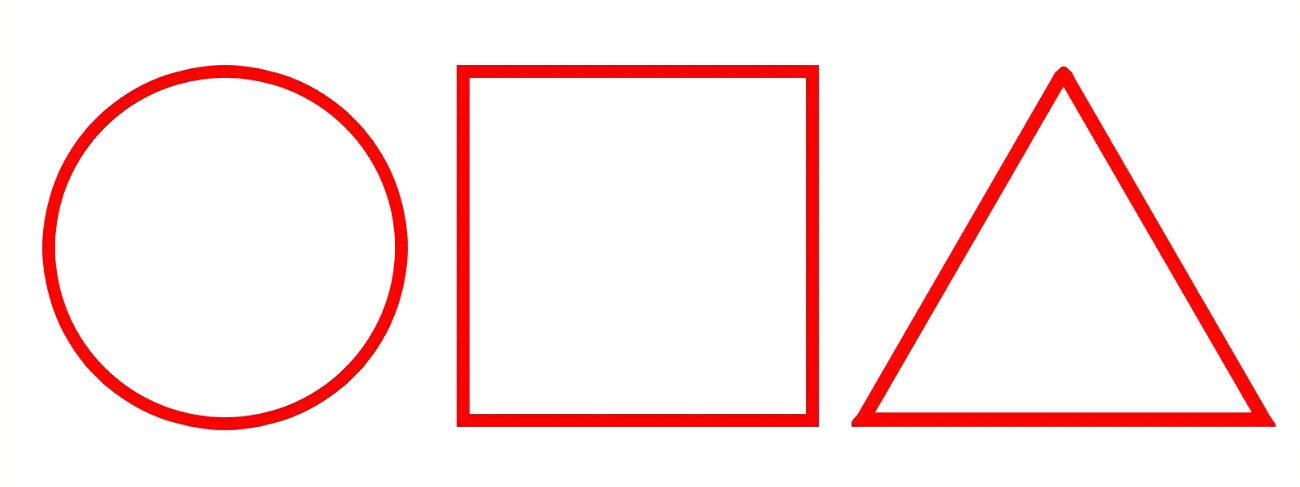

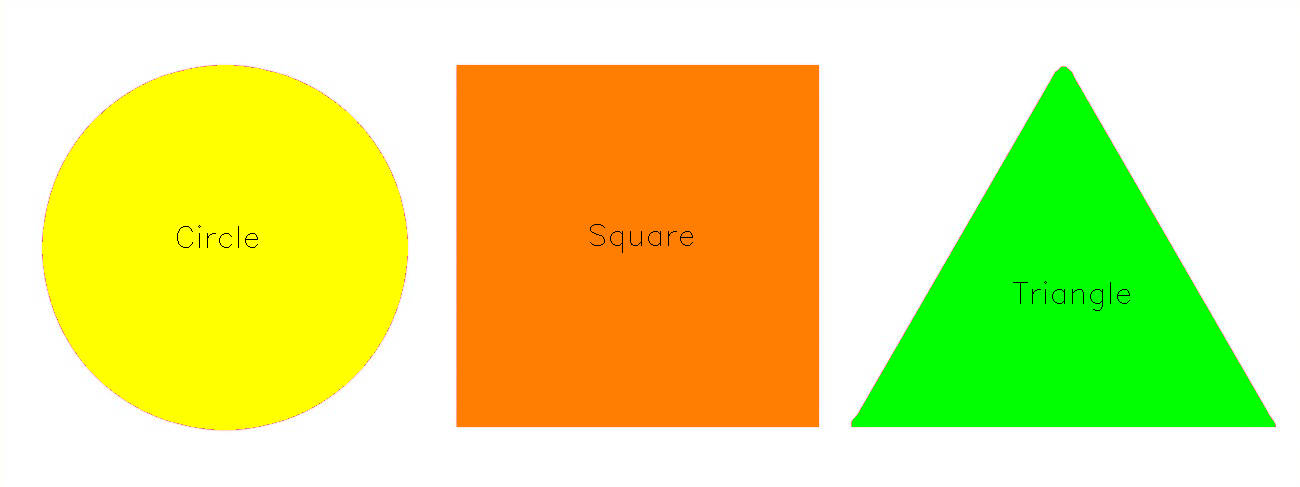

In [4]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

# Load and then gray scale image
image = cv2.imread('/content/shapes.jpeg')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

cv2_imshow(image)  # Show original image

ret, thresh = cv2.threshold(gray, 127, 255, 1)

# Extract Contours
contours, hierarchy = cv2.findContours(thresh.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for cnt in contours:
    approx = cv2.approxPolyDP(cnt, 0.01 * cv2.arcLength(cnt, True), True)

    M = cv2.moments(cnt)
    if M["m00"] == 0: continue  # avoid division by zero
    cx = int(M['m10'] / M['m00'])
    cy = int(M['m01'] / M['m00'])

    if len(approx) == 3:
        shape_name = "Triangle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 0), -1)

    elif len(approx) == 4:
        x, y, w, h = cv2.boundingRect(cnt)
        if abs(w - h) <= 3:
            shape_name = "Square"
            cv2.drawContours(image, [cnt], 0, (0, 125, 255), -1)
        else:
            shape_name = "Rectangle"
            cv2.drawContours(image, [cnt], 0, (0, 0, 255), -1)

    elif len(approx) == 10:
        shape_name = "Star"
        cv2.drawContours(image, [cnt], 0, (255, 255, 0), -1)

    elif len(approx) >= 15:
        shape_name = "Circle"
        cv2.drawContours(image, [cnt], 0, (0, 255, 255), -1)

    else:
        continue

    cv2.putText(image, shape_name, (cx - 50, cy), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 1)

# Show final result with all shapes labeled
cv2_imshow(image)
